### 🧐 Data Analysis
- Bring dataset and Do basic data analysis
- Do Group Analysis code
- Draw Data Visualization

### 🏃 Basic Data Analysis

In [1]:
import pandas as pd

In [2]:
# Load dataset
data = pd.read_csv('../data/big-five-mbti-and-tipi-test-results.zip', compression="zip")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 140 non-null    int64  
 1   openness           140 non-null    float64
 2   conscientiousness  140 non-null    float64
 3   extraversion       140 non-null    float64
 4   agreeableness      140 non-null    float64
 5   neuroticism        140 non-null    float64
 6   big5Accuracy       140 non-null    int64  
 7   extraverted        140 non-null    int64  
 8   intuitive          140 non-null    int64  
 9   thinking           140 non-null    int64  
 10  judging            140 non-null    int64  
 11  mbtiAccuracy       140 non-null    int64  
 12  Q1                 140 non-null    int64  
 13  Q2                 140 non-null    int64  
 14  Q3                 140 non-null    int64  
 15  Q4                 140 non-null    int64  
 16  Q5                 140 non

In [3]:
# Drop unused rows
unused_index = ['id', 'big5Accuracy', 'mbtiAccuracy', 
                'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']
data = data.drop(columns=unused_index)
data.head()

,openness,conscientiousness,extraversion,agreeableness,neuroticism,extraverted,intuitive,thinking,judging
0,76.67,58.33,58.33,65.83,48.33,2,69,58,37
1,67.50,77.50,50.00,73.33,70.00,17,55,53,54
2,66.67,75.00,68.33,70.00,60.83,63,28,35,47
3,54.17,70.00,54.17,73.33,62.50,33,45,58,67
4,78.33,41.67,72.50,80.83,74.17,65,69,14,22


In [4]:
# Convert en2kor code for korean user
kor_index = ['개방성', '성실성', '외향성', '우호성', '신경성', 
             '외향', '직관', '사고', '판단']
data.columns=kor_index
data.head()

,개방성,성실성,외향성,우호성,신경성,외향,직관,사고,판단
0,76.67,58.33,58.33,65.83,48.33,2,69,58,37
1,67.50,77.50,50.00,73.33,70.00,17,55,53,54
2,66.67,75.00,68.33,70.00,60.83,63,28,35,47
3,54.17,70.00,54.17,73.33,62.50,33,45,58,67
4,78.33,41.67,72.50,80.83,74.17,65,69,14,22


In [5]:
data['E'] = data['외향'] > 50
data['N'] = data['직관'] > 50
data['T'] = data['사고'] > 50
data['J'] = data['판단'] > 50

'''
for English User
data['E'] = data['extraverted'] > 50
data['N'] = data['intuitive'] > 50
data['T'] = data['thinking'] > 50
data['J'] = data['judging'] > 50
'''

data.head()

,개방성,성실성,외향성,우호성,신경성,외향,직관,사고,판단,E,N,T,J
0,76.67,58.33,58.33,65.83,48.33,2,69,58,37,False,True,True,False
1,67.50,77.50,50.00,73.33,70.00,17,55,53,54,False,True,True,True
2,66.67,75.00,68.33,70.00,60.83,63,28,35,47,True,False,False,False
3,54.17,70.00,54.17,73.33,62.50,33,45,58,67,False,False,True,True
4,78.33,41.67,72.50,80.83,74.17,65,69,14,22,True,True,False,False


### 👨‍👩‍👧 Group Analysis

In [6]:
def print_group(data: pd.DataFrame, column: str) -> None:
    group = data.groupby(by=column)
    for isok, value in group:
        print(column, ": ", isok)
        here_value = value.drop(columns=column)
        print(here_value.head())
        print()

def analyze_group(data: pd.DataFrame, column: str) -> None:
    group = data.groupby(by=column)
    for isok, value in group:
        print(column, ": ", isok)
        print("개방성 평균: ", value['개방성'].mean())
        print("성실성 평균: ", value['성실성'].mean())
        print("외향성 평균: ", value['외향성'].mean())
        print("우호성 평균: ", value['우호성'].mean())
        print("신경성 평균: ", value['신경성'].mean())
        print()

In [7]:
print_group(data, 'E')

E :  False
     개방성    성실성    외향성    우호성    신경성  외향  직관  사고  판단      N      T      J
0  76.67  58.33  58.33  65.83  48.33   2  69  58  37   True   True  False
1  67.50  77.50  50.00  73.33  70.00  17  55  53  54   True   True   True
3  54.17  70.00  54.17  73.33  62.50  33  45  58  67  False   True   True
7  74.17  61.67  60.83  72.50  67.50  49  41  44  33  False  False  False
8  62.50  72.50  60.00  54.17  60.00  35  56  79  60   True   True   True

E :  True
      개방성    성실성    외향성    우호성    신경성  외향  직관  사고  판단      N      T      J
2   66.67  75.00  68.33  70.00  60.83  63  28  35  47  False  False  False
4   78.33  41.67  72.50  80.83  74.17  65  69  14  22   True  False  False
5   65.00  55.00  70.83  70.00  76.67  71  59  31  37   True  False  False
6   76.67  72.50  75.00  84.17  62.50  83  63  24  43   True  False  False
14  65.00  72.50  76.67  74.17  65.00  75  42  39  78  False  False   True



In [8]:
analyze_group(data, 'E')

E :  False
개방성 평균:  74.05826086956522
성실성 평균:  63.956434782608696
외향성 평균:  50.81182608695652
우호성 평균:  73.57278260869566
신경성 평균:  67.57982608695652

E :  True
개방성 평균:  73.4668
성실성 평균:  62.8324
외향성 평균:  72.3664
우호성 평균:  75.434
신경성 평균:  60.800399999999996



In [9]:
print_group(data, 'N')

N :  False
      개방성    성실성    외향성    우호성    신경성  외향  직관  사고  판단      E      T      J
2   66.67  75.00  68.33  70.00  60.83  63  28  35  47   True  False  False
3   54.17  70.00  54.17  73.33  62.50  33  45  58  67  False   True   True
7   74.17  61.67  60.83  72.50  67.50  49  41  44  33  False  False  False
9   59.17  63.33  54.17  75.83  60.83  21  38  53  39  False   True  False
10  56.67  64.17  30.00  80.00  73.33   7  28  42  43  False  False  False

N :  True
     개방성    성실성    외향성    우호성    신경성  외향  직관  사고  판단      E      T      J
0  76.67  58.33  58.33  65.83  48.33   2  69  58  37  False   True  False
1  67.50  77.50  50.00  73.33  70.00  17  55  53  54  False   True   True
4  78.33  41.67  72.50  80.83  74.17  65  69  14  22   True  False  False
5  65.00  55.00  70.83  70.00  76.67  71  59  31  37   True  False  False
6  76.67  72.50  75.00  84.17  62.50  83  63  24  43   True  False  False



In [10]:
analyze_group(data, 'N')

N :  False
개방성 평균:  64.76767441860464
성실성 평균:  65.81395348837209
외향성 평균:  53.89581395348837
우호성 평균:  75.87232558139536
신경성 평균:  64.84488372093023

N :  True
개방성 평균:  78.02432989690722
성실성 평균:  62.84329896907216
외향성 평균:  55.0
우호성 평균:  73.03309278350515
신경성 평균:  67.04494845360823



In [11]:
print_group(data, 'T')

T :  False
     개방성    성실성    외향성    우호성    신경성  외향  직관  사고  판단      E      N      J
2  66.67  75.00  68.33  70.00  60.83  63  28  35  47   True  False  False
4  78.33  41.67  72.50  80.83  74.17  65  69  14  22   True   True  False
5  65.00  55.00  70.83  70.00  76.67  71  59  31  37   True   True  False
6  76.67  72.50  75.00  84.17  62.50  83  63  24  43   True   True  False
7  74.17  61.67  60.83  72.50  67.50  49  41  44  33  False  False  False

T :  True
     개방성    성실성    외향성    우호성    신경성  외향  직관  사고  판단      E      N      J
0  76.67  58.33  58.33  65.83  48.33   2  69  58  37  False   True  False
1  67.50  77.50  50.00  73.33  70.00  17  55  53  54  False   True   True
3  54.17  70.00  54.17  73.33  62.50  33  45  58  67  False  False   True
8  62.50  72.50  60.00  54.17  60.00  35  56  79  60  False   True   True
9  59.17  63.33  54.17  75.83  60.83  21  38  53  39  False  False  False



In [12]:
analyze_group(data, 'T')

T :  False
개방성 평균:  75.13922222222223
성실성 평균:  64.58322222222222
외향성 평균:  56.41688888888889
우호성 평균:  78.61177777777779
신경성 평균:  66.35222222222222

T :  True
개방성 평균:  71.8168
성실성 평균:  62.2662
외향성 평균:  51.5
우호성 평균:  65.4332
신경성 평균:  66.3998



In [13]:
print_group(data, 'J')

J :  False
     개방성    성실성    외향성    우호성    신경성  외향  직관  사고  판단      E      N      T
0  76.67  58.33  58.33  65.83  48.33   2  69  58  37  False   True   True
2  66.67  75.00  68.33  70.00  60.83  63  28  35  47   True  False  False
4  78.33  41.67  72.50  80.83  74.17  65  69  14  22   True   True  False
5  65.00  55.00  70.83  70.00  76.67  71  59  31  37   True   True  False
6  76.67  72.50  75.00  84.17  62.50  83  63  24  43   True   True  False

J :  True
      개방성   성실성    외향성    우호성   신경성  외향  직관  사고  판단      E      N      T
1   67.50  77.5  50.00  73.33  70.0  17  55  53  54  False   True   True
3   54.17  70.0  54.17  73.33  62.5  33  45  58  67  False  False   True
8   62.50  72.5  60.00  54.17  60.0  35  56  79  60  False   True   True
13  51.67  42.5  59.17  77.50  65.0  33  27  36  56  False  False  False
14  65.00  72.5  76.67  74.17  65.0  75  42  39  78   True  False  False



In [14]:
analyze_group(data, 'J')

J :  False
개방성 평균:  75.84341176470588
성실성 평균:  57.754470588235286
외향성 평균:  55.206
우호성 평균:  74.13729411764706
신경성 평균:  68.40176470588234

J :  True
개방성 평균:  71.03054545454545
성실성 평균:  73.03036363636363
외향성 평균:  53.81836363636364
우호성 평균:  73.54636363636364
신경성 평균:  63.228



### 📈 Data Visualization

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

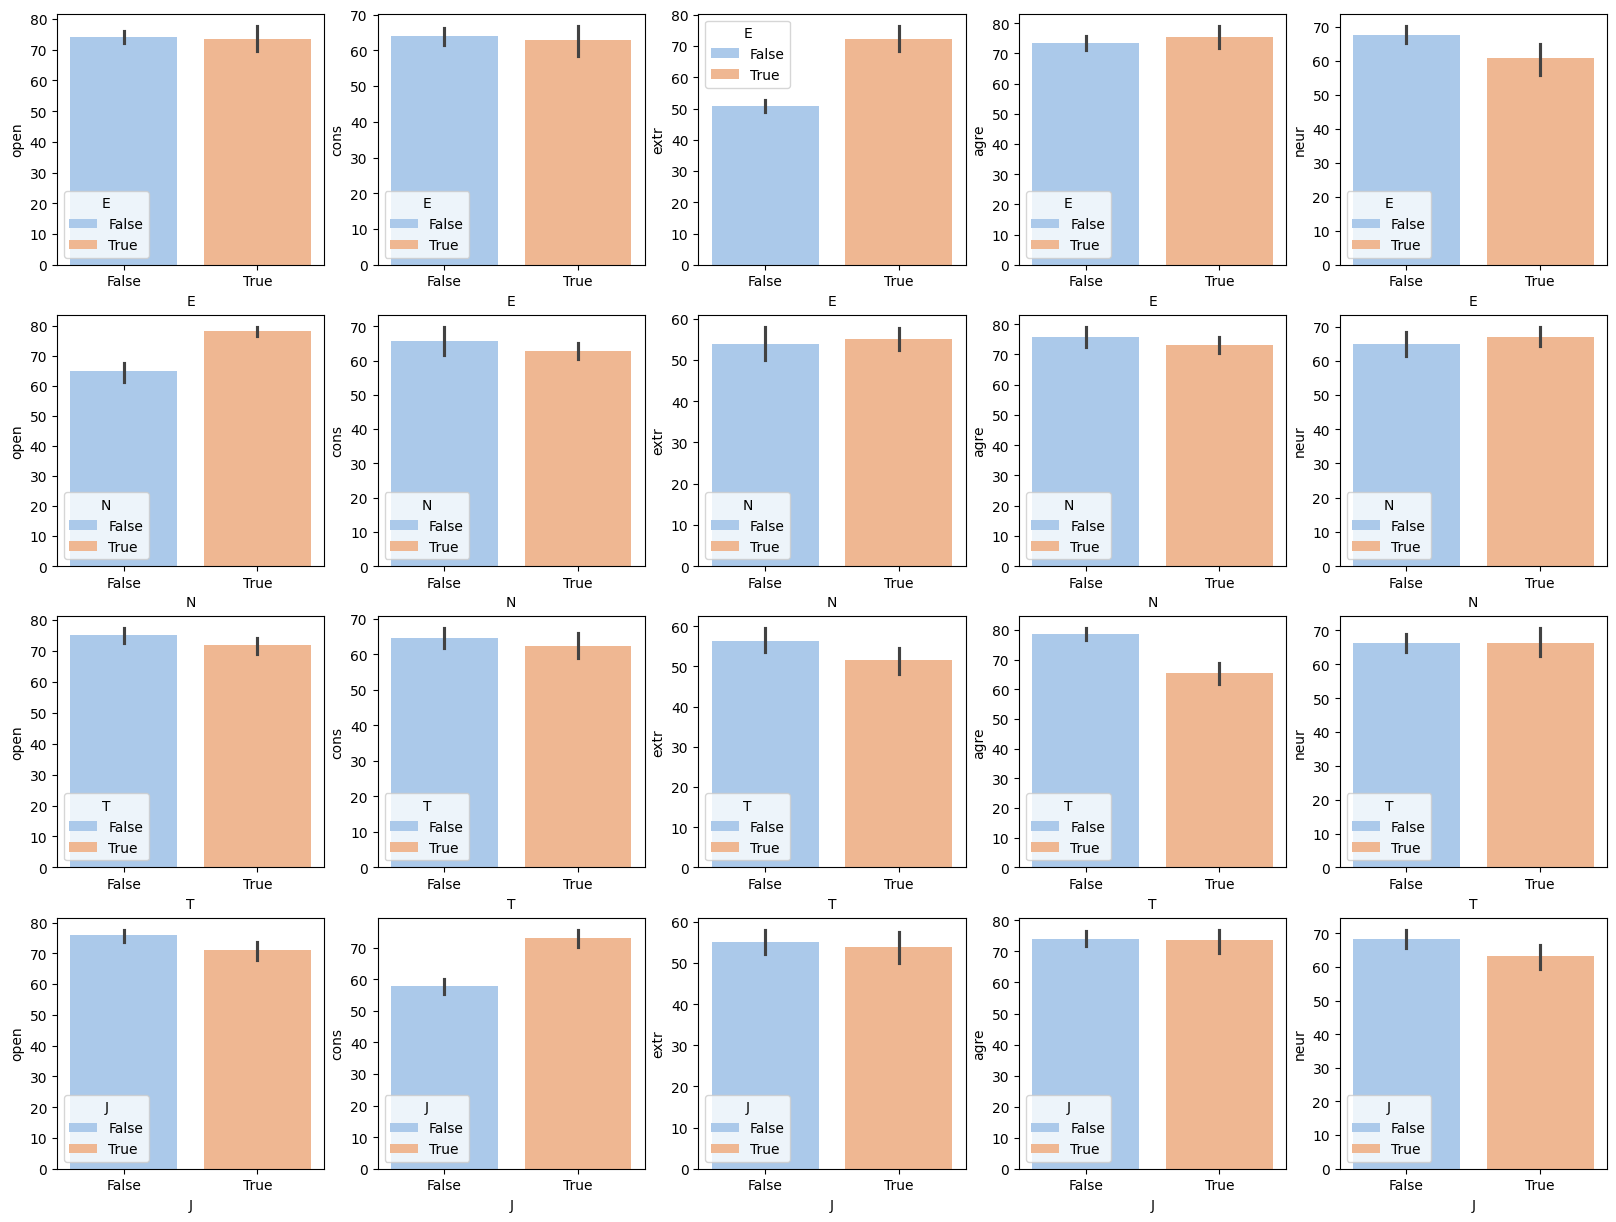

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
axes = axes.flatten()

personal = ['E', 'N', 'T', 'J']
types = ['개방성', '성실성', '외향성', '우호성', '신경성']
labels = ['open', 'cons', 'extr', 'agre', 'neur']

for col, p in enumerate(personal): 
    for row, t in enumerate(types):
        here_index = col * 5 + row
        sns.barplot(x=data[p], y=data[t], ax=axes[here_index], palette='pastel', hue=data[p])
        axes[here_index].set_ylabel(labels[row])
        axes[here_index].set_xlabel(p)
plt.show()

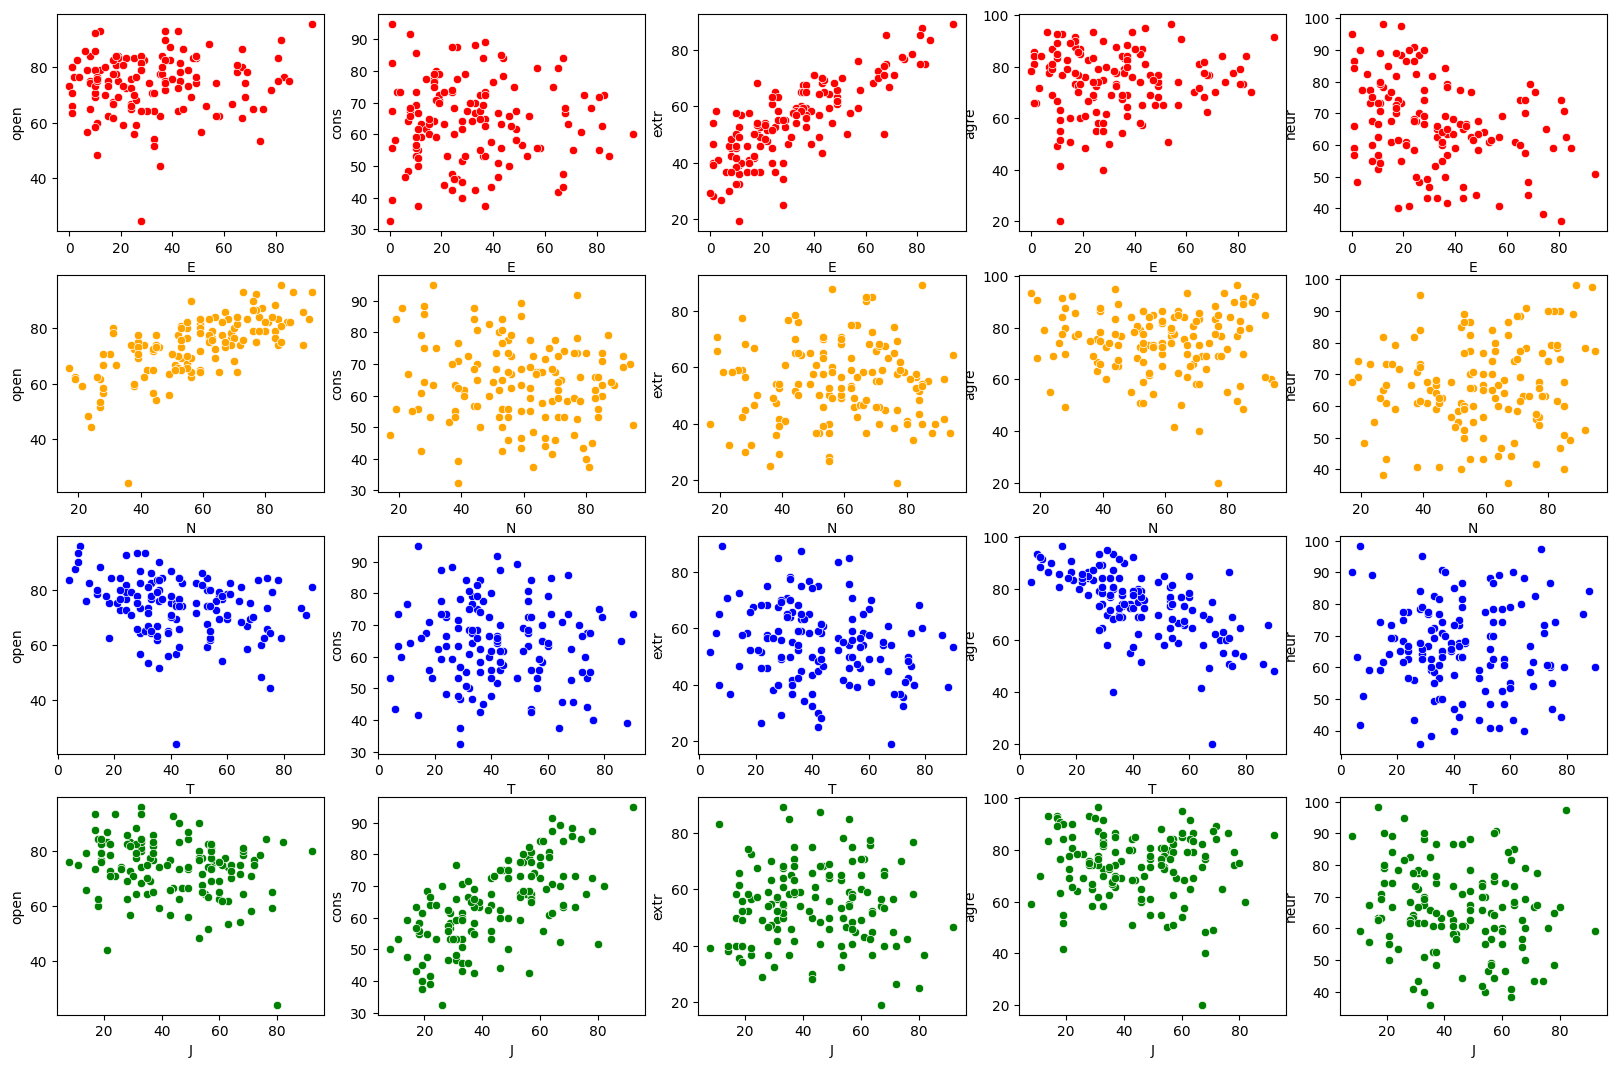

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 13))
axes = axes.flatten()

personal = ['E', 'N', 'T', 'J']
peronslity_types = ["외향", "직관", "사고", "판단"]
types = ['개방성', '성실성', '외향성', '우호성', '신경성']
labels = ['open', 'cons', 'extr', 'agre', 'neur']

colors = ["red", "orange", "blue", "green"]
for col, p in enumerate(peronslity_types): 
    for row, t in enumerate(types):
        here_index = col * 5 + row
        sns.scatterplot(x=data[p], y=data[t], ax=axes[here_index], color=colors[col])
        axes[here_index].set_ylabel(labels[row])
        axes[here_index].set_xlabel(personal[col])
plt.show()

<Axes: >

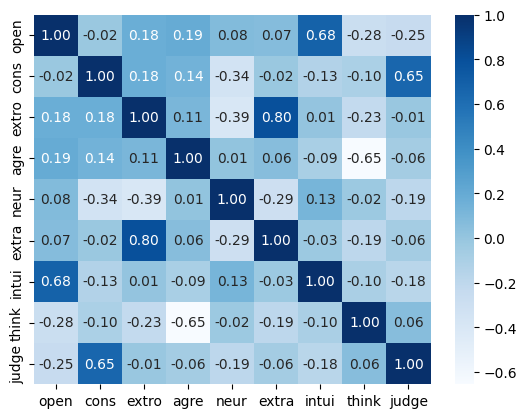

In [18]:
index = ["open", "cons", "extro", "agre", "neur", "extra", "intui", "think", "judge"]

data_float = data.drop(columns=['E', 'N', 'T', 'J'])
data_float.columns = index
data_corr = data_float.corr()

sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="Blues")